Data source : https://www.kaggle.com/grassknoted/asl-alphabet   
This notebook is to build various Neural network models for the purpose of sign language classification. Images are in grayscale.    

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report

2021-10-15 06:57:37.251405: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [2]:
image_path = "../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  image_path,
  image_size=(224,224),
  batch_size=32,
validation_split=0.25,
  subset="training",
  seed=123,
color_mode = 'grayscale')


val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  image_path,
  image_size=(224,224),
  batch_size=32,
validation_split=0.25,
  subset="validation",
  seed=123,
color_mode = 'grayscale')

test_path = "../input/asl-alphabet/asl_alphabet_test/asl_alphabet_test"



Found 87000 files belonging to 29 classes.
Using 65250 files for training.


2021-10-15 06:58:29.861793: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-15 06:58:29.865254: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-10-15 06:58:29.912479: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-15 06:58:29.913135: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-10-15 06:58:29.913194: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-10-15 06:58:29.940074: I tensorflow/stream_executor/platform/def

Found 87000 files belonging to 29 classes.
Using 21750 files for validation.


In [3]:
import glob
import pathlib 

data_dir = pathlib.Path(image_path)
class_names = np.array(sorted([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"]))
print(class_names)

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z' 'del' 'nothing' 'space']


In [4]:
import cv2
import os

test_class = []
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        test_class.append(filename[0])
        img = cv2.imread(os.path.join(folder,filename), 0)
        img = cv2.resize(img , (224,224))
        if img is not None:
            images.append(img)
    return images

pred_images = load_images_from_folder(test_path)
test_class

['A',
 'E',
 'L',
 'N',
 'S',
 'D',
 'G',
 'I',
 'W',
 'M',
 'n',
 'X',
 'H',
 'Q',
 'C',
 'T',
 'P',
 'V',
 'Y',
 'U',
 's',
 'O',
 'B',
 'R',
 'F',
 'Z',
 'J',
 'K']

In [5]:
type(pred_images)

list

In [6]:
pred_images = np.array(pred_images)
print(pred_images.shape)
pred_images_resized = pred_images.reshape(pred_images.shape[0], 224, 224, 1)
print(pred_images_resized.shape)

(28, 224, 224)
(28, 224, 224, 1)


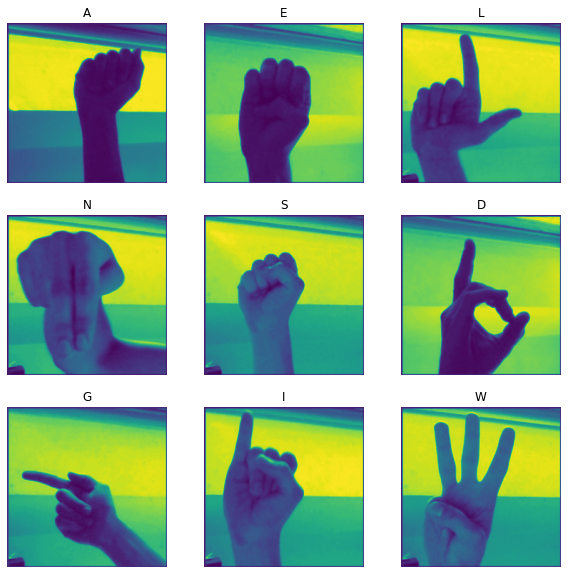

In [7]:
## visualize prediction images 
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(pred_images[i])
    plt.title(test_class[i])
    plt.axis("off")

2021-10-15 07:10:34.532694: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-15 07:10:34.536972: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000129999 Hz


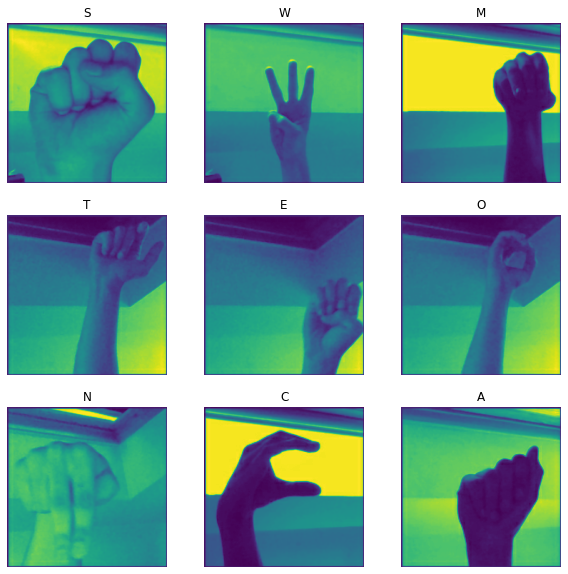

In [8]:
## visualize train set images
image_batch, label_batch = next(iter(train_ds))
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    label = label_batch[i]
    name = class_names[label]
    plt.title(name)
    plt.axis("off")

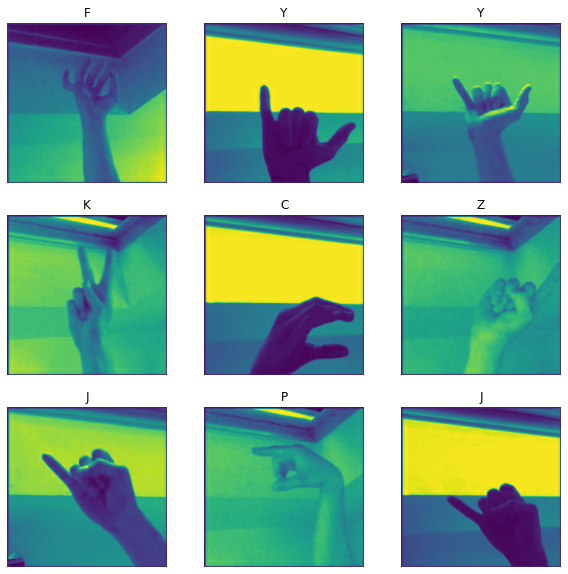

In [9]:
## visualize validation images 
image_batch, label_batch = next(iter(val_ds))
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    label = label_batch[i]
    name = class_names[label]
    plt.title(name)
    plt.axis("off")

Epoch 1/10
2040/2040 [==============================] - 159s 78ms/step - loss: 504.6153 - accuracy: 0.0334 - val_loss: 3.3677 - val_accuracy: 0.0327
Epoch 2/10
2040/2040 [==============================] - 158s 77ms/step - loss: 3.3676 - accuracy: 0.0318 - val_loss: 3.3677 - val_accuracy: 0.0327
Epoch 3/10
2040/2040 [==============================] - 156s 77ms/step - loss: 3.3677 - accuracy: 0.0325 - val_loss: 3.3677 - val_accuracy: 0.0327
Epoch 4/10
2040/2040 [==============================] - 159s 78ms/step - loss: 3.3677 - accuracy: 0.0324 - val_loss: 3.3677 - val_accuracy: 0.0327
Epoch 5/10
2040/2040 [==============================] - 159s 78ms/step - loss: 3.3676 - accuracy: 0.0319 - val_loss: 3.3677 - val_accuracy: 0.0327
Epoch 6/10
2040/2040 [==============================] - 158s 77ms/step - loss: 3.3676 - accuracy: 0.0326 - val_loss: 3.3678 - val_accuracy: 0.0327
Epoch 7/10
2040/2040 [==============================] - 157s 77ms/step - loss: 3.3676 - accuracy: 0.0322 - val_loss:

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


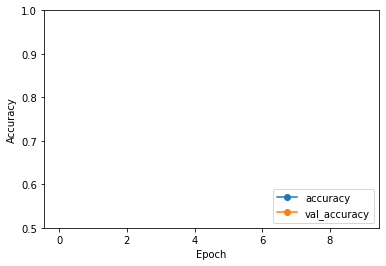

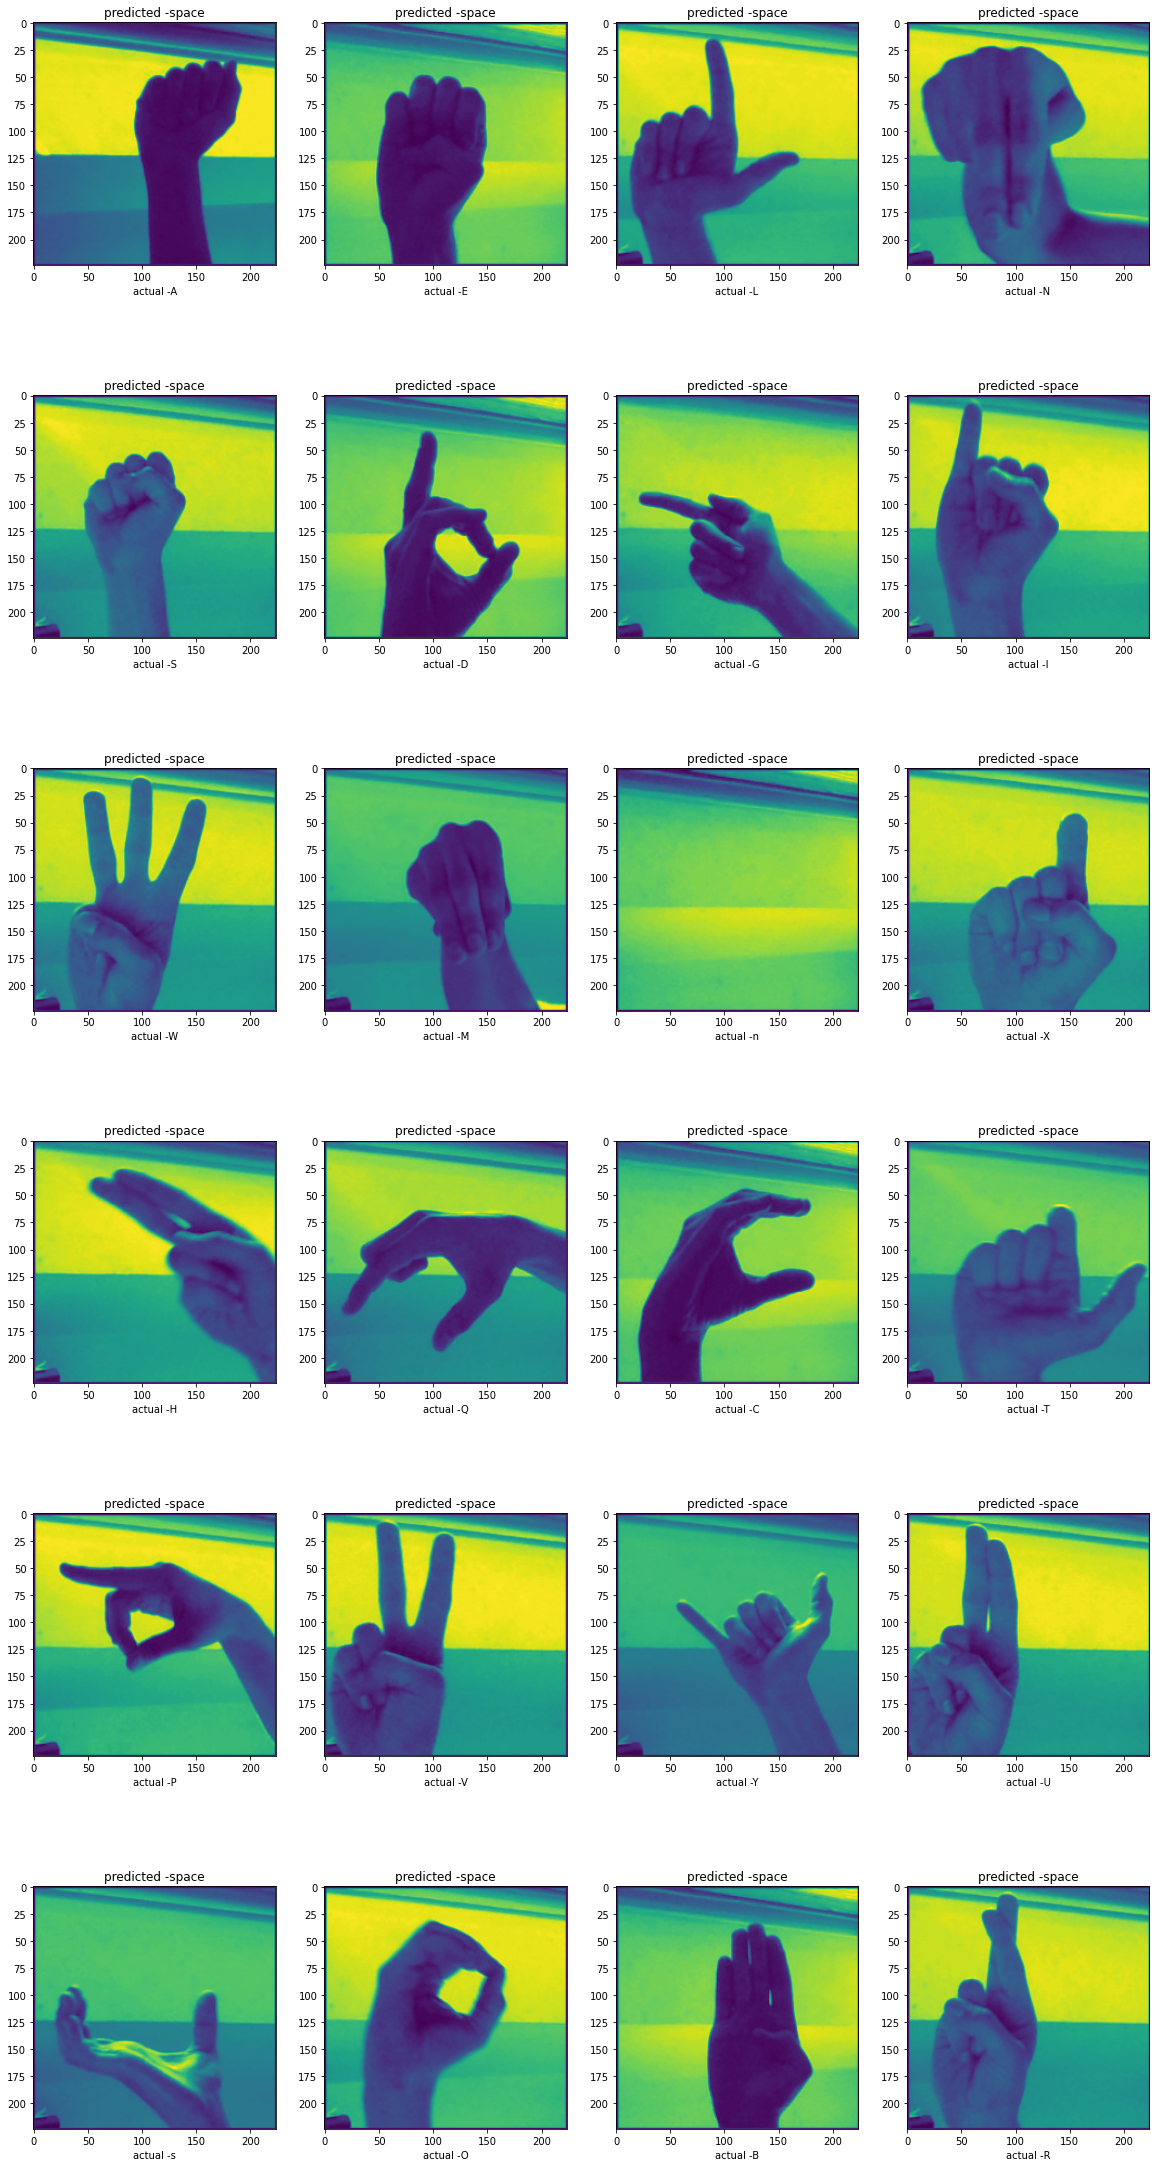

In [12]:
## single layer CNN 

##
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 1), filters = 64, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),      
  tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation=tf.nn.relu),
tf.keras.layers.Dense(29, activation=tf.nn.softmax)])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(train_ds, epochs=10, validation_data = val_ds)
##
test_loss, test_acc = model.evaluate(val_ds)
print("Validation image accuracy :{}".format(test_acc))
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
##
model.save('model_cnn1')
##

## for validation data set , check the classification report.
val_pred = np.array([])
val_labels = np.array([])
for x, y in val_ds:
    predictions =  np.argmax(model.predict(x), axis = -1)
    val_pred = np.concatenate([val_pred,np.array(predictions)])
    val_labels = np.concatenate([val_labels , y.numpy()])
    
##
print('Classification Report')
target_names = class_names
print(classification_report(val_labels, val_pred, target_names=class_names))
##
print(model.summary())
##
predicted_labels = model.predict(pred_images_resized)
pred_labels = np.argmax(predicted_labels, axis = -1)
##
## visualize prediction images with the prediction 
plt.figure(figsize=(20, 40))
for i in range(24):
    ax = plt.subplot(6, 4, i + 1)
    plt.imshow(pred_images[i])
    plt.title("predicted -" + class_names[pred_labels[i]])
    plt.xlabel("actual -" + test_class[i])

One layer CNN model performs very poorly as shown above.  

Epoch 1/10
2040/2040 [==============================] - 158s 77ms/step - loss: 22.0471 - accuracy: 0.4642 - val_loss: 0.4418 - val_accuracy: 0.8518
Epoch 2/10
2040/2040 [==============================] - 157s 77ms/step - loss: 0.3344 - accuracy: 0.8845 - val_loss: 0.3431 - val_accuracy: 0.8969
Epoch 3/10
2040/2040 [==============================] - 157s 77ms/step - loss: 0.1830 - accuracy: 0.9363 - val_loss: 0.3032 - val_accuracy: 0.9128
Epoch 4/10
2040/2040 [==============================] - 158s 77ms/step - loss: 0.1502 - accuracy: 0.9490 - val_loss: 0.3952 - val_accuracy: 0.9031
Epoch 5/10
2040/2040 [==============================] - 157s 77ms/step - loss: 0.1248 - accuracy: 0.9596 - val_loss: 0.2592 - val_accuracy: 0.9283
Epoch 6/10
2040/2040 [==============================] - 156s 76ms/step - loss: 0.0982 - accuracy: 0.9690 - val_loss: 0.3159 - val_accuracy: 0.9307
Epoch 7/10
2040/2040 [==============================] - 156s 76ms/step - loss: 0.0923 - accuracy: 0.9708 - val_loss: 

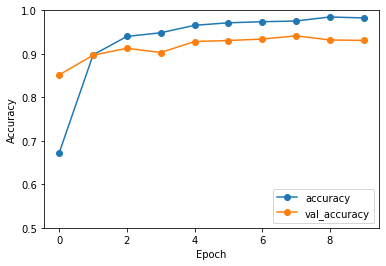

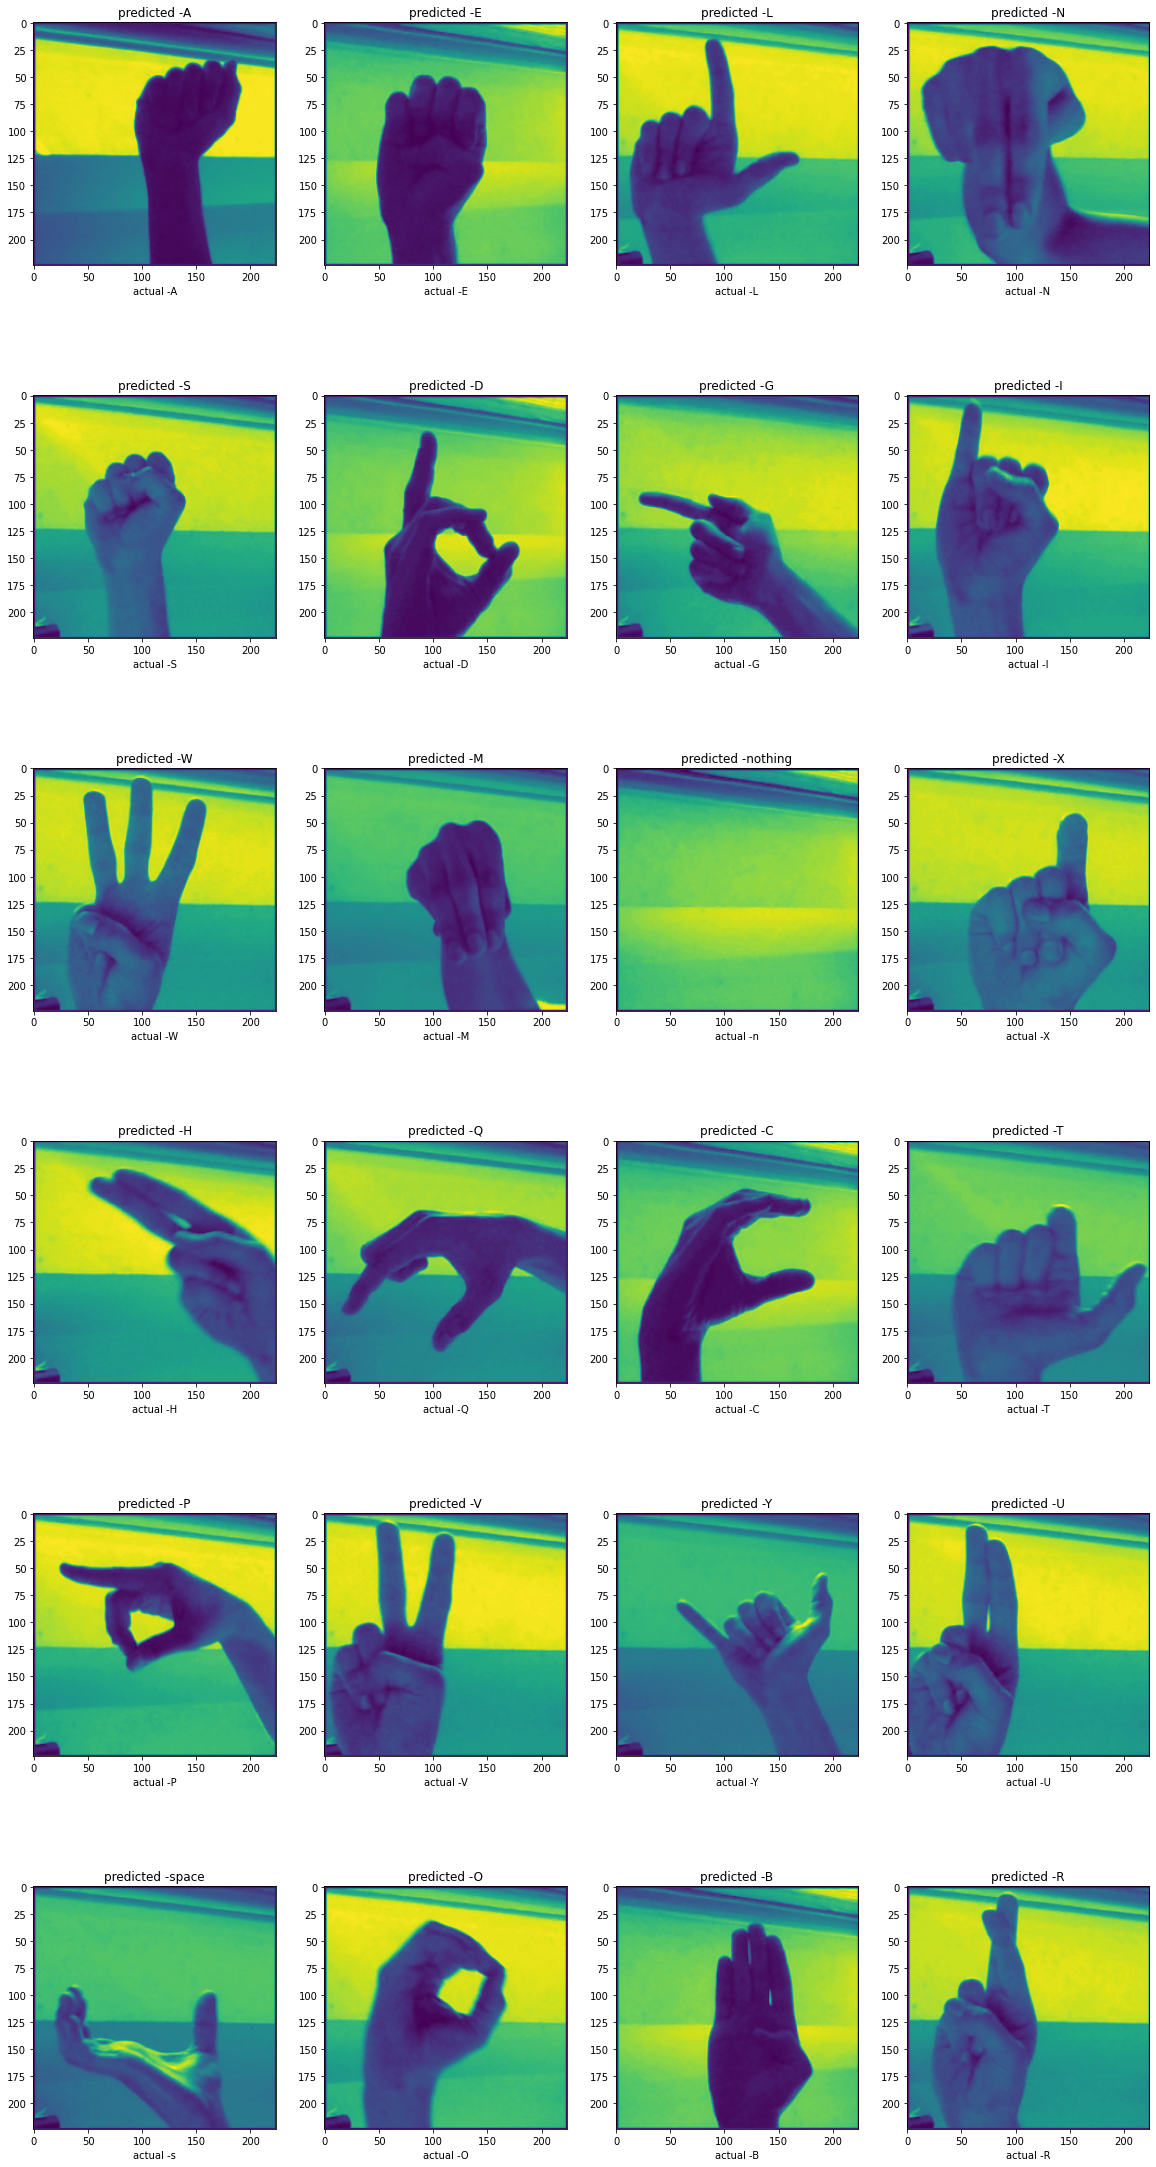

In [11]:
## two layer CNN 

##
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 1), filters = 64, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
     tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 1), filters = 64, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),   
  tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation=tf.nn.relu),
tf.keras.layers.Dense(29, activation=tf.nn.softmax)])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(train_ds, epochs=10, validation_data = val_ds)
##
test_loss, test_acc = model.evaluate(val_ds)
print("Test image accuracy :{}".format(test_acc))
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
##
model.save('model_cnn2')
## for validation data set , check the classification report.
val_pred = np.array([])
val_labels = np.array([])
for x, y in val_ds:
    predictions =  np.argmax(model.predict(x), axis = -1)
    val_pred = np.concatenate([val_pred,np.array(predictions)])
    val_labels = np.concatenate([val_labels , y.numpy()])
    
##
print('Classification Report')
target_names = class_names
print(classification_report(val_labels, val_pred, target_names=class_names))
##
print(model.summary())
##
predicted_labels = model.predict(pred_images_resized)
pred_labels = np.argmax(predicted_labels, axis = -1)
##
## visualize prediction images with the prediction 
plt.figure(figsize=(20, 40))
for i in range(24):
    ax = plt.subplot(6, 4, i + 1)
    plt.imshow(pred_images[i])
    plt.title("predicted -" + class_names[pred_labels[i]])
    plt.xlabel("actual -" + test_class[i])

The 2 layer CNN + Maxpooling model has predicted all the test images correctly.  

Epoch 1/10


2021-10-15 07:11:19.369729: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-10-15 07:11:20.177358: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2021-10-15 07:11:20.197189: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


2040/2040 [==============================] - 480s 232ms/step - loss: 2.5642 - accuracy: 0.5203 - val_loss: 0.3333 - val_accuracy: 0.8805
Epoch 2/10
2040/2040 [==============================] - 154s 76ms/step - loss: 0.2805 - accuracy: 0.9041 - val_loss: 0.2527 - val_accuracy: 0.9192
Epoch 3/10
2040/2040 [==============================] - 153s 75ms/step - loss: 0.2881 - accuracy: 0.9190 - val_loss: 0.1710 - val_accuracy: 0.9437
Epoch 4/10
2040/2040 [==============================] - 152s 75ms/step - loss: 0.1170 - accuracy: 0.9601 - val_loss: 0.1621 - val_accuracy: 0.9506
Epoch 5/10
2040/2040 [==============================] - 152s 75ms/step - loss: 0.1061 - accuracy: 0.9670 - val_loss: 0.1478 - val_accuracy: 0.9578
Epoch 6/10
2040/2040 [==============================] - 154s 75ms/step - loss: 0.0796 - accuracy: 0.9744 - val_loss: 0.0989 - val_accuracy: 0.9719
Epoch 7/10
2040/2040 [==============================] - 154s 75ms/step - loss: 0.0569 - accuracy: 0.9824 - val_loss: 0.1094 - va

2021-10-15 07:42:46.352251: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Classification Report
              precision    recall  f1-score   support

           A       0.99      0.97      0.98       774
           B       0.96      1.00      0.98       759
           C       0.97      0.99      0.98       739
           D       0.99      0.98      0.98       766
           E       0.97      0.98      0.97       745
           F       0.98      1.00      0.99       745
           G       0.99      0.97      0.98       760
           H       0.95      0.99      0.97       743
           I       1.00      0.97      0.99       757
           J       1.00      0.97      0.98       719
           K       0.99      0.98      0.99       712
           L       0.99      0.99      0.99       748
           M       0.98      0.97      0.98       756
           N       0.97      0.98      0.97       765
           O       0.97      0.96      0.97       762
           P       0.99      0.98      0.99       741
           Q       0.98      1.00      0.99       758
     

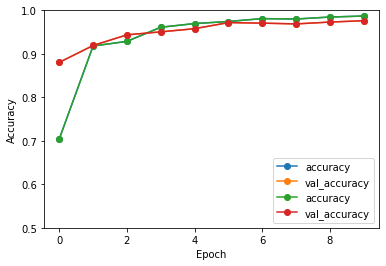

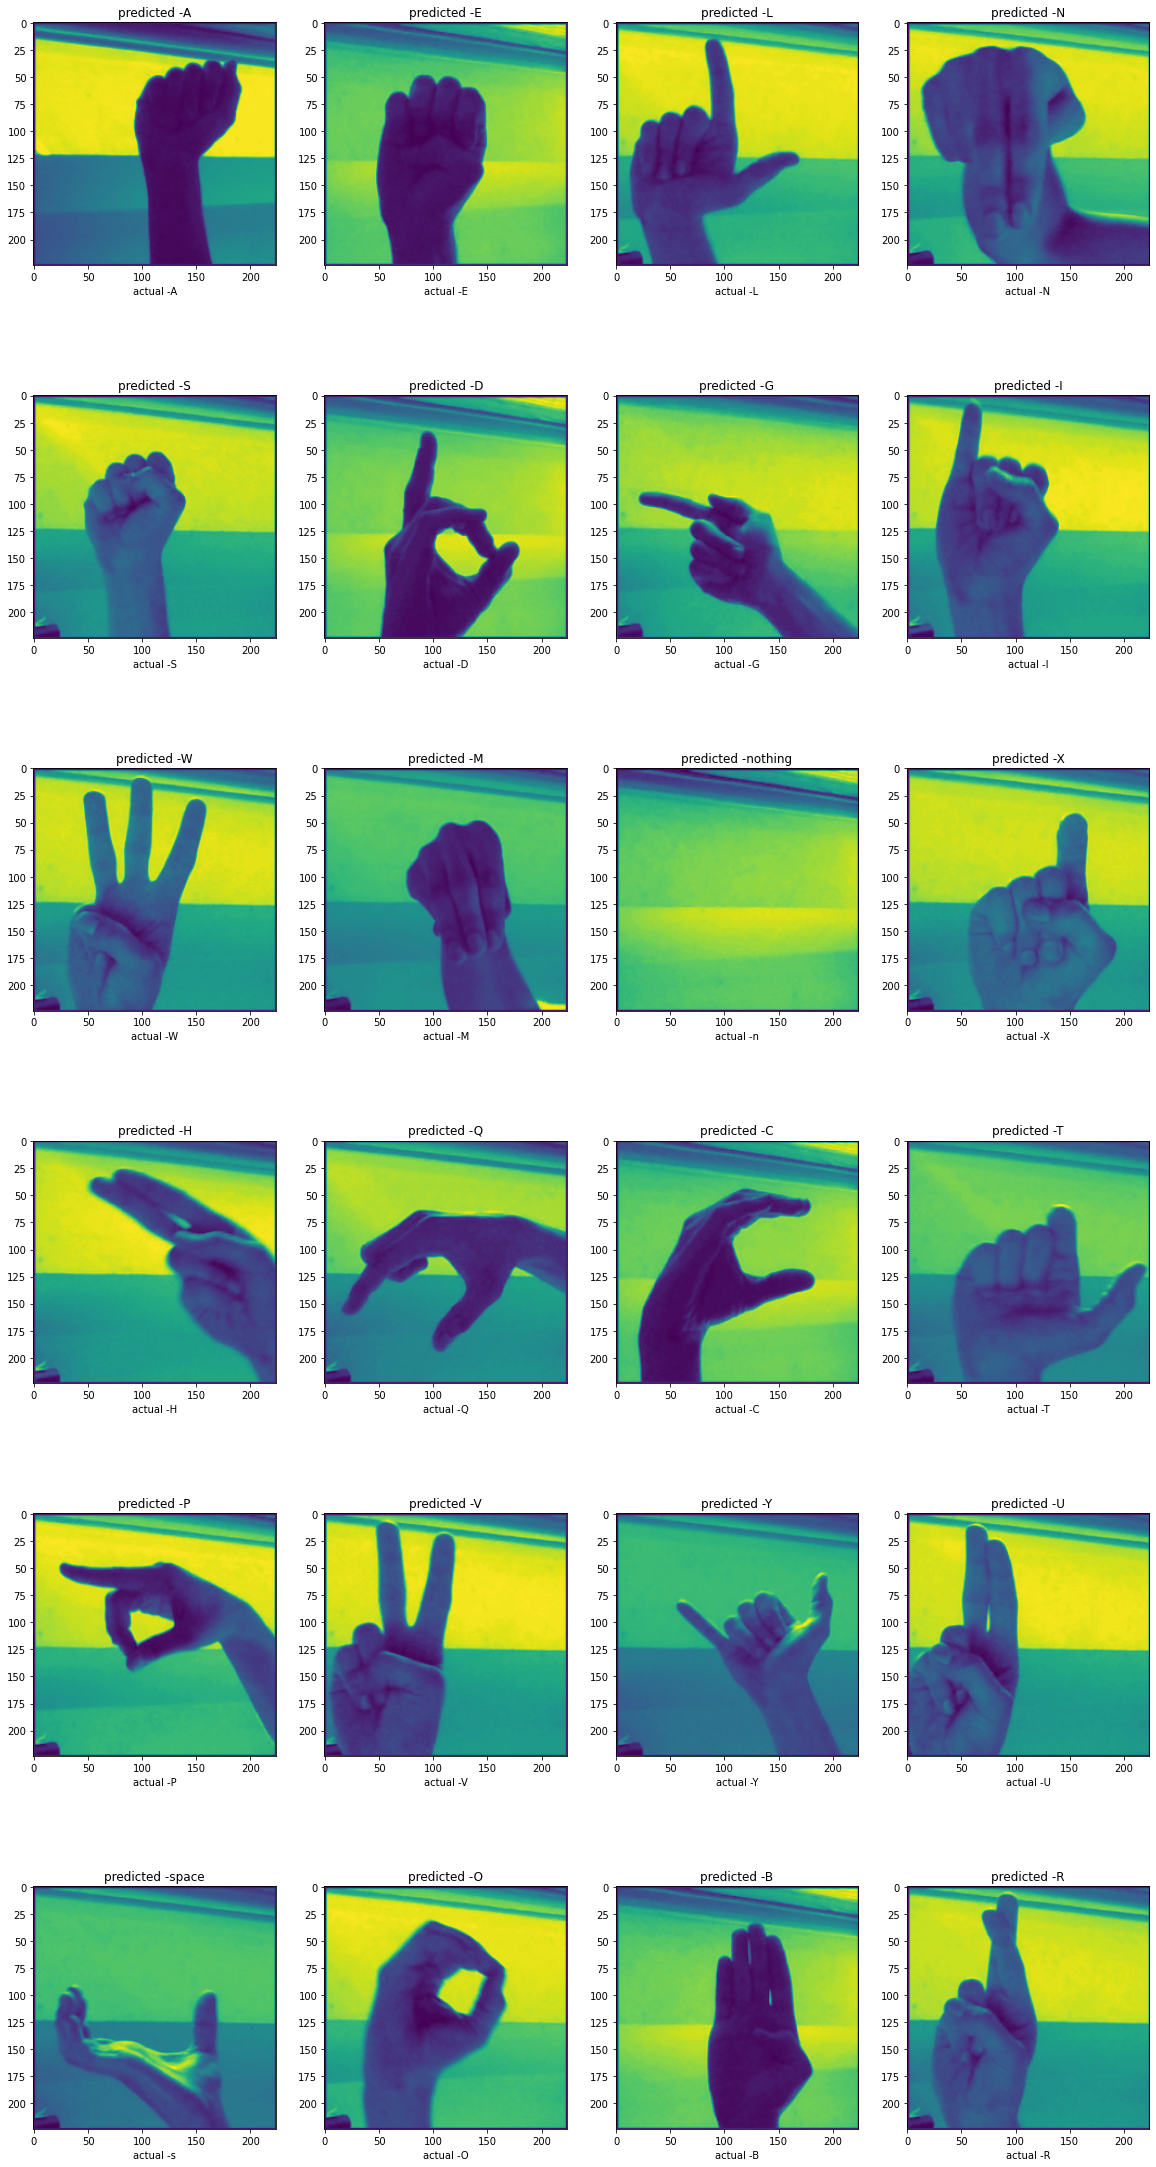

In [10]:
## three layer CNN 

##
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 1), filters = 64, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),   
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 1), filters = 64, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),   
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 1), filters = 64, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
     tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation=tf.nn.relu),
tf.keras.layers.Dense(29, activation=tf.nn.softmax)])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(train_ds, epochs=10, validation_data = val_ds)
##
test_loss, test_acc = model.evaluate(val_ds)
print("Validation image accuracy :{}".format(test_acc))
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
##
model.save('model_cnn3')
##
##
## for validation data set , check the classification report.
val_pred = np.array([])
val_labels = np.array([])
for x, y in val_ds:
    predictions =  np.argmax(model.predict(x), axis = -1)
    val_pred = np.concatenate([val_pred,np.array(predictions)])
    val_labels = np.concatenate([val_labels , y.numpy()])
    
##
print('Classification Report')
target_names = class_names
print(classification_report(val_labels, val_pred, target_names=class_names))
##
print(model.summary())
##
predicted_labels = model.predict(pred_images_resized)
pred_labels = np.argmax(predicted_labels, axis = -1)
##
## visualize prediction images with the prediction 
plt.figure(figsize=(20, 40))
for i in range(24):
    ax = plt.subplot(6, 4, i + 1)
    plt.imshow(pred_images[i])
    plt.title("predicted -" + class_names[pred_labels[i]])
    plt.xlabel("actual -" + test_class[i])
    

The 3 layer CNN model with 64 filters trained on grayscale images has 100% test set accuracy.  

Epoch 1/10
2040/2040 [==============================] - 101s 49ms/step - loss: 4.9960 - accuracy: 0.6151 - val_loss: 0.1804 - val_accuracy: 0.9351
Epoch 2/10
2040/2040 [==============================] - 100s 49ms/step - loss: 0.1617 - accuracy: 0.9468 - val_loss: 0.1518 - val_accuracy: 0.9551
Epoch 3/10
2040/2040 [==============================] - 101s 49ms/step - loss: 0.0851 - accuracy: 0.9737 - val_loss: 0.1717 - val_accuracy: 0.9484
Epoch 4/10
2040/2040 [==============================] - 101s 49ms/step - loss: 0.0686 - accuracy: 0.9790 - val_loss: 0.0735 - val_accuracy: 0.9765
Epoch 5/10
2040/2040 [==============================] - 100s 49ms/step - loss: 0.0511 - accuracy: 0.9842 - val_loss: 0.0930 - val_accuracy: 0.9730
Epoch 6/10
2040/2040 [==============================] - 100s 49ms/step - loss: 0.0380 - accuracy: 0.9887 - val_loss: 0.0674 - val_accuracy: 0.9806
Epoch 7/10
2040/2040 [==============================] - 101s 50ms/step - loss: 0.0428 - accuracy: 0.9881 - val_loss: 0

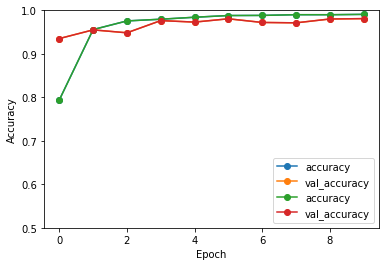

In [13]:
## three layer with lesser filters 

##
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224,1), filters = 8, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),   
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 1), filters = 16, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)),   
    tf.keras.layers.Conv2D( activation='relu', input_shape=(224, 224, 1), filters = 32, kernel_size = 3),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2, 2)), 
     tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation=tf.nn.relu),
tf.keras.layers.Dense(29, activation=tf.nn.softmax)])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
%time history = model.fit(train_ds, epochs=10, validation_data = val_ds)
##
test_loss, test_acc = model.evaluate(val_ds)
print("Validation image accuracy :{}".format(test_acc))
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
##
model.save('model_cnn3.1')
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
##
model.save('model_cnn3_dp')
##
## for validation data set , check the classification report.
val_pred = np.array([])
val_labels = np.array([])
for x, y in val_ds:
    predictions =  np.argmax(model.predict(x), axis = -1)
    val_pred = np.concatenate([val_pred,np.array(predictions)])
    val_labels = np.concatenate([val_labels , y.numpy()])
    
##
print('Classification Report')
target_names = class_names
print(classification_report(val_labels, val_pred, target_names=class_names))
##
print(model.summary())
##


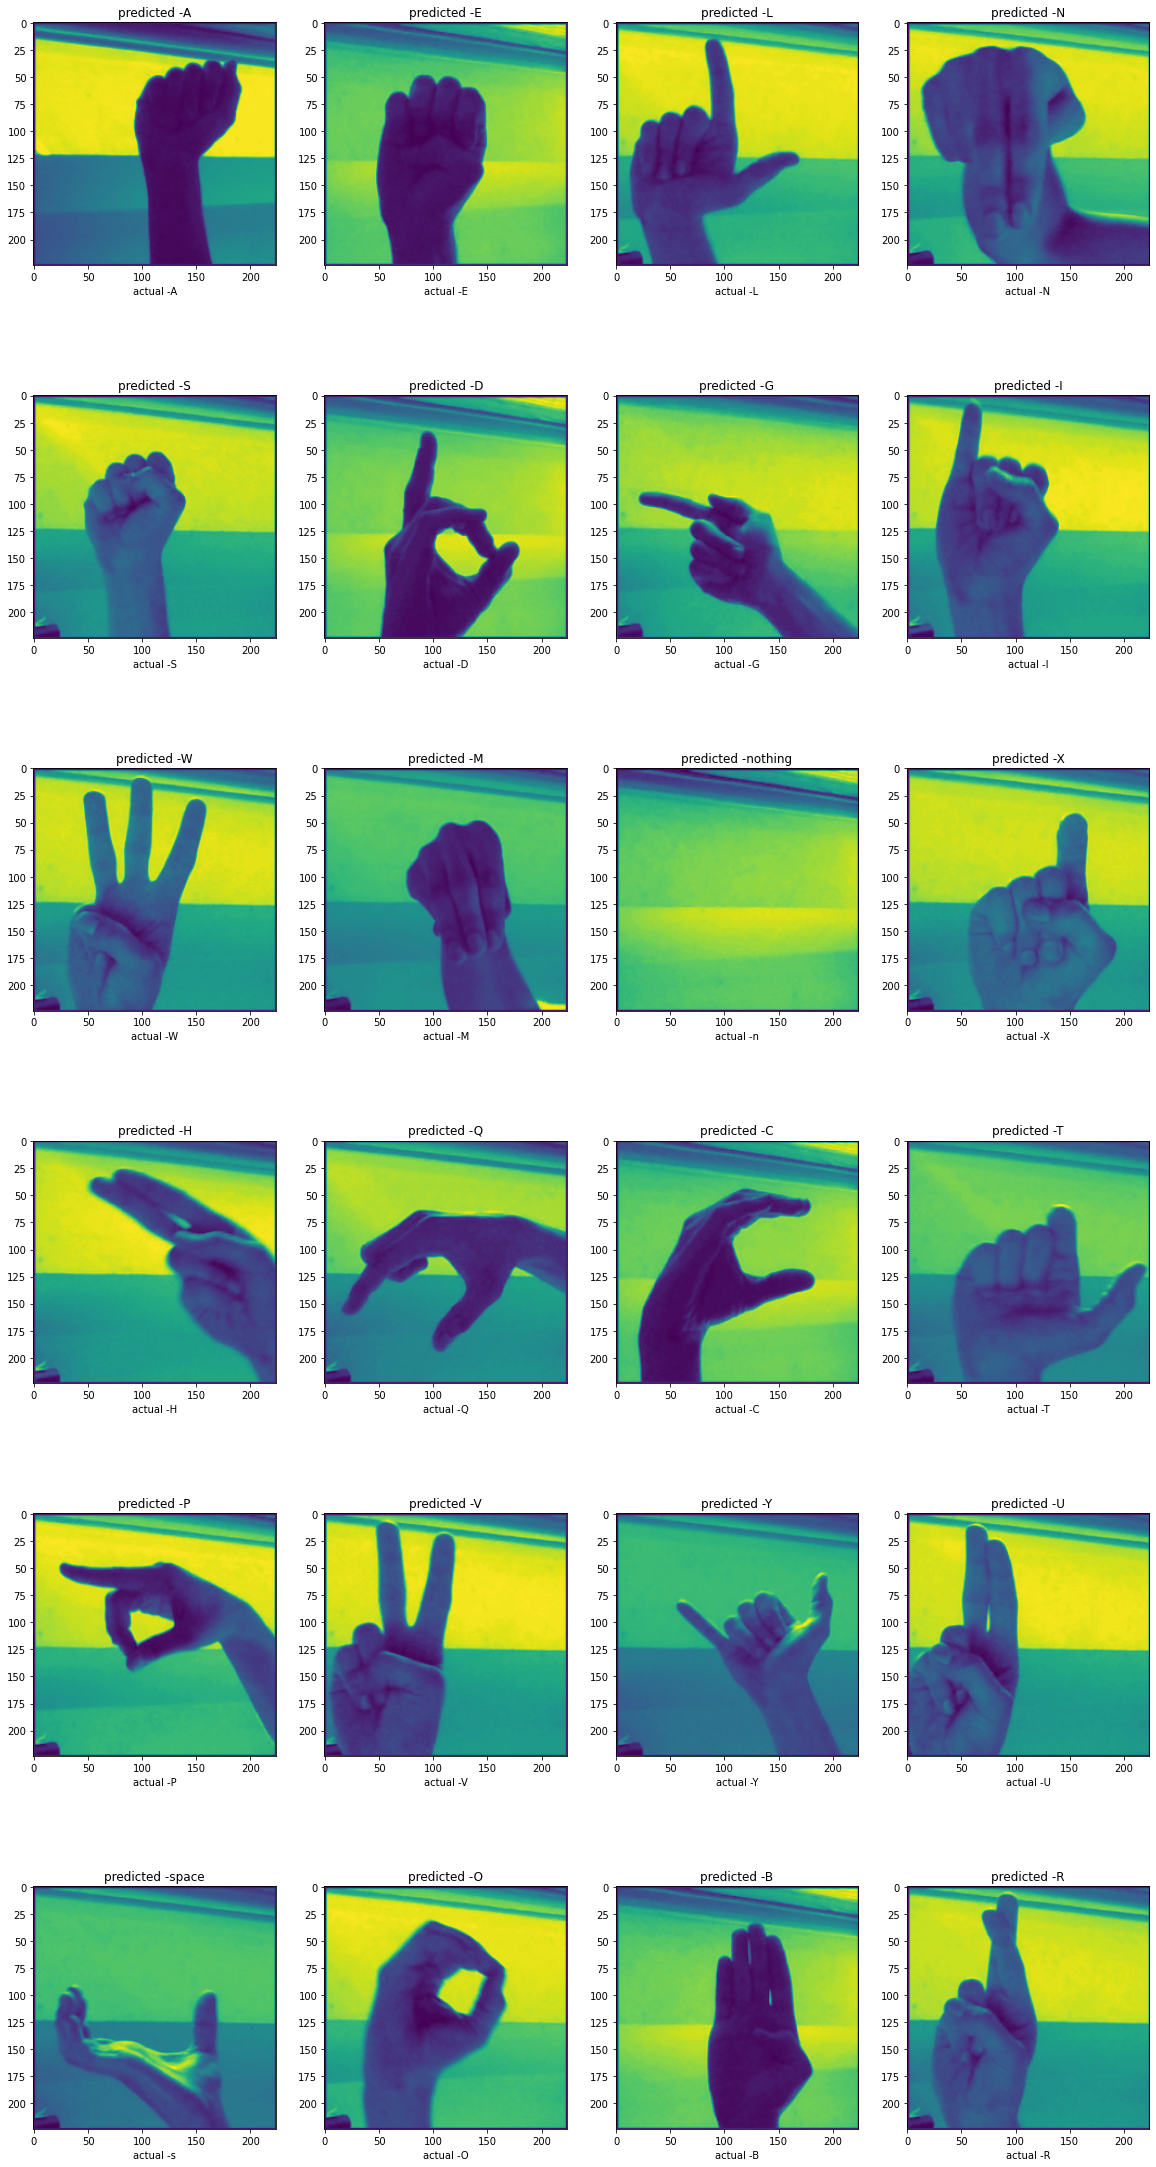

In [14]:
predicted_labels = model.predict(pred_images_resized)
pred_labels = np.argmax(predicted_labels, axis = -1)
##
## visualize prediction images with the prediction 
plt.figure(figsize=(20, 40))
for i in range(24):
    ax = plt.subplot(6, 4, i + 1)
    plt.imshow(pred_images[i])
    plt.title("predicted -" + class_names[pred_labels[i]])
    plt.xlabel("actual -" + test_class[i])
    

As shown above , a two layer CNN Model with filters 64 and 64 gives a very good test set accuraccy. The three layer models also perform similarly.